In [1]:
import pandas as pd
import numpy as np

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
from scipy import stats

## Data Collection and Cleaning

#### 1. Read the Dataset into a DataFrame

In [2]:
UberData = pd.read_csv('Uber Data.csv')

In [3]:
UberData.shape

(1156, 7)

In [4]:
UberData.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
UberData.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#### 2. Delete the last row as it has got totals and NaNs

In [6]:
UberData.drop([1155], axis = 0, inplace = True)

In [7]:
UberData.shape

(1155, 7)

In [8]:
UberData.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


#### 3. Check for any missing values in the DataFrame

In [9]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


##### From the above result we can see nulls are present only in the 'Purpose' column.

In [10]:
UberData['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [11]:
UberData['PURPOSE*'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

#### 4. Convert Start Date and End Date columns to DateTime Format.Split Start Date into Start Date and Start Time columns. Similarly split End Date into End Date and End Time columns. 

In [12]:
UberData['START_DATE*'] = pd.to_datetime(UberData['START_DATE*'])
UberData['END_DATE*'] = pd.to_datetime(UberData['END_DATE*'])

In [13]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [14]:
UberData['Start Date'] = UberData['START_DATE*'].dt.date
UberData['Start Time'] = UberData['START_DATE*'].dt.time
UberData.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,01:25:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00


#### In the recording there is another method see that also

In [15]:
UberData['End Date'] = UberData['END_DATE*'].dt.date
UberData['End Time'] = UberData['END_DATE*'].dt.time
UberData.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,01:25:00,2016-01-02,01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00


In [16]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   Start Date   1155 non-null   object        
 8   Start Time   1155 non-null   object        
 9   End Date     1155 non-null   object        
 10  End Time     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 108.3+ KB


#### 5.  Add a column 'Weekday' which stores the day of the week that the trip took place. The values of this feature vary from 0 to 6, where 0 represents Monday and 6 represents Sunday.


In [17]:
UberData['Weekday'] = UberData['START_DATE*'].apply(lambda x: x.dayofweek)
UberData.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,01:25:00,2016-01-02,01:37:00,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,2


In [ ]:
### For another method see the video recording

In [18]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   Start Date   1155 non-null   object        
 8   Start Time   1155 non-null   object        
 9   End Date     1155 non-null   object        
 10  End Time     1155 non-null   object        
 11  Weekday      1155 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 117.3+ KB


#### 6. The main feature that Harsh needs to study, the time duration of the trips, is not explicitly present in the dataset. Hence, he adds a feature 'Duration' which stores the duration of the trip in minutes. It is basically the difference between the start and end times. 

In [19]:
duration = UberData['END_DATE*'] - UberData['START_DATE*']
UberData['Duration'] = [t.total_seconds()/60 for t in duration]   # duration in minutes
UberData.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,4,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,01:25:00,2016-01-02,01:37:00,5,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,5,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,2,67.0


In [20]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   Start Date   1155 non-null   object        
 8   Start Time   1155 non-null   object        
 9   End Date     1155 non-null   object        
 10  End Time     1155 non-null   object        
 11  Weekday      1155 non-null   int64         
 12  Duration     1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 126.3+ KB


#### 7. He also came to know that Jacob was out of country (USA) at 3 specific instances. The entries corresponding to the trips in countries other than the USA are deleted by him to ensure the cohesiveness of the data.


In [21]:
# making 3 dataframes corresponding to 3 time intervals
d1 = UberData[UberData['Start Date'].between(pd.to_datetime('2016-02-16'), pd.to_datetime('2016-02-21'))]
d2 = UberData[UberData['Start Date'].between(pd.to_datetime('2016-08-15'), pd.to_datetime('2016-10-14'))]
d3 = UberData[UberData['Start Date'].between(pd.to_datetime('2016-12-17'), pd.to_datetime('2016-12-31'))]

In [22]:
d1

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration
108,2016-02-16 03:21:00,2016-02-16 04:13:00,Business,Katunayaka,Unknown Location,43.7,Customer Visit,2016-02-16,03:21:00,2016-02-16,04:13:00,1,52.0
109,2016-02-16 08:29:00,2016-02-16 09:34:00,Business,Unknown Location,Colombo,14.1,NaN,2016-02-16,08:29:00,2016-02-16,09:34:00,1,65.0
110,2016-02-16 10:31:00,2016-02-16 10:41:00,Business,Colombo,Colombo,2.6,NaN,2016-02-16,10:31:00,2016-02-16,10:41:00,1,10.0
111,2016-02-16 11:32:00,2016-02-16 12:02:00,Business,Colombo,Colombo,4.5,NaN,2016-02-16,11:32:00,2016-02-16,12:02:00,1,30.0
112,2016-02-16 12:39:00,2016-02-16 12:42:00,Business,Colombo,Colombo,1.7,NaN,2016-02-16,12:39:00,2016-02-16,12:42:00,1,3.0
113,2016-02-16 13:43:00,2016-02-16 13:55:00,Business,Colombo,Colombo,1.8,Temporary Site,2016-02-16,13:43:00,2016-02-16,13:55:00,1,12.0
114,2016-02-16 16:34:00,2016-02-16 17:10:00,Business,Colombo,Colombo,6.0,NaN,2016-02-16,16:34:00,2016-02-16,17:10:00,1,36.0
115,2016-02-16 17:17:00,2016-02-16 17:26:00,Business,Colombo,Nugegoda,1.1,Meal/Entertain,2016-02-16,17:17:00,2016-02-16,17:26:00,1,9.0
116,2016-02-16 17:40:00,2016-02-16 17:44:00,Business,Nugegoda,Unknown Location,3.6,Errand/Supplies,2016-02-16,17:40:00,2016-02-16,17:44:00,1,4.0
117,2016-02-17 13:18:00,2016-02-17 14:04:00,Business,Unknown Location,Colombo,14.7,Temporary Site,2016-02-17,13:18:00,2016-02-17,14:04:00,2,46.0


In [23]:
d2

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration
656,2016-08-15 09:05:00,2016-08-15 09:52:00,Business,R?walpindi,Unknown Location,15.6,NaN,2016-08-15,09:05:00,2016-08-15,09:52:00,0,47.0
657,2016-08-15 15:20:00,2016-08-15 15:47:00,Business,Unknown Location,Unknown Location,14.1,NaN,2016-08-15,15:20:00,2016-08-15,15:47:00,0,27.0
658,2016-08-15 16:52:00,2016-08-15 17:30:00,Business,Unknown Location,Unknown Location,15.7,NaN,2016-08-15,16:52:00,2016-08-15,17:30:00,0,38.0
659,2016-08-15 19:08:00,2016-08-15 20:30:00,Business,Unknown Location,Unknown Location,25.9,Temporary Site,2016-08-15,19:08:00,2016-08-15,20:30:00,0,82.0
660,2016-08-16 07:58:00,2016-08-16 08:11:00,Business,Unknown Location,Unknown Location,7.9,NaN,2016-08-16,07:58:00,2016-08-16,08:11:00,1,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,2016-10-13 16:08:00,2016-10-13 16:53:00,Business,Islamabad,Unknown Location,10.9,NaN,2016-10-13,16:08:00,2016-10-13,16:53:00,3,45.0
810,2016-10-14 08:50:00,2016-10-14 09:44:00,Business,Unknown Location,R?walpindi,12.7,NaN,2016-10-14,08:50:00,2016-10-14,09:44:00,4,54.0
811,2016-10-14 10:16:00,2016-10-14 10:52:00,Business,R?walpindi,Unknown Location,12.4,NaN,2016-10-14,10:16:00,2016-10-14,10:52:00,4,36.0
812,2016-10-14 15:56:00,2016-10-14 16:20:00,Business,Unknown Location,Unknown Location,3.8,NaN,2016-10-14,15:56:00,2016-10-14,16:20:00,4,24.0


In [24]:
d3

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration
1055,2016-12-17 15:38:00,2016-12-17 16:12:00,Business,Unknown Location,Unknown Location,4.8,Airport/Travel,2016-12-17,15:38:00,2016-12-17,16:12:00,5,34.0
1056,2016-12-17 17:19:00,2016-12-17 17:59:00,Business,Unknown Location,Unknown Location,5.3,Temporary Site,2016-12-17,17:19:00,2016-12-17,17:59:00,5,40.0
1057,2016-12-18 13:03:00,2016-12-18 13:41:00,Business,Unknown Location,Unknown Location,4.9,Errand/Supplies,2016-12-18,13:03:00,2016-12-18,13:41:00,6,38.0
1058,2016-12-18 16:38:00,2016-12-18 17:25:00,Business,Unknown Location,Unknown Location,10.2,Errand/Supplies,2016-12-18,16:38:00,2016-12-18,17:25:00,6,47.0
1059,2016-12-18 20:35:00,2016-12-18 21:04:00,Business,Unknown Location,Unknown Location,9.2,NaN,2016-12-18,20:35:00,2016-12-18,21:04:00,6,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,01:07:00,2016-12-31,01:14:00,5,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13:24:00,2016-12-31,13:42:00,5,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15:03:00,2016-12-31,15:38:00,5,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21:32:00,2016-12-31,21:50:00,5,18.0


In [25]:
# Dropping the concatenated Dataframe using the index to have only US locations in the UberData Dataframe
UberData = UberData.drop(pd.concat([d1,d2,d3]).index)

In [26]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 1054
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  850 non-null    datetime64[ns]
 1   END_DATE*    850 non-null    datetime64[ns]
 2   CATEGORY*    850 non-null    object        
 3   START*       850 non-null    object        
 4   STOP*        850 non-null    object        
 5   MILES*       850 non-null    float64       
 6   PURPOSE*     523 non-null    object        
 7   Start Date   850 non-null    object        
 8   Start Time   850 non-null    object        
 9   End Date     850 non-null    object        
 10  End Time     850 non-null    object        
 11  Weekday      850 non-null    int64         
 12  Duration     850 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 93.0+ KB


#### 8. The columns 'START_DATE' and 'END_DATE' are also removed by Harsh as their information is present in the columns 'Start Date', 'Start Time', 'End Date' and 'End Time', i.e., they have become redundant.


In [27]:
UberData = UberData.drop(['START_DATE*','END_DATE*'], axis = 1)

In [28]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATEGORY*   850 non-null    object 
 1   START*      850 non-null    object 
 2   STOP*       850 non-null    object 
 3   MILES*      850 non-null    float64
 4   PURPOSE*    523 non-null    object 
 5   Start Date  850 non-null    object 
 6   Start Time  850 non-null    object 
 7   End Date    850 non-null    object 
 8   End Time    850 non-null    object 
 9   Weekday     850 non-null    int64  
 10  Duration    850 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 79.7+ KB


#### 9. Finally, Harsh imputes the feature 'PURPOSE*' with the modal value since it is a categorical variable.

In [29]:
UberData['PURPOSE*'].value_counts()

Meeting            158
Meal/Entertain     139
Errand/Supplies     92
Customer Visit      86
Temporary Site      25
Between Offices     17
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

In [30]:
mode = UberData['PURPOSE*'].mode()[0]
mode

'Meeting'

In [31]:
# data imputation with mode
mode =UberData['PURPOSE*'].mode()[0]
UberData['PURPOSE*'] = UberData['PURPOSE*'].fillna(mode)

In [33]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATEGORY*   850 non-null    object 
 1   START*      850 non-null    object 
 2   STOP*       850 non-null    object 
 3   MILES*      850 non-null    float64
 4   PURPOSE*    850 non-null    object 
 5   Start Date  850 non-null    object 
 6   Start Time  850 non-null    object 
 7   End Date    850 non-null    object 
 8   End Time    850 non-null    object 
 9   Weekday     850 non-null    int64  
 10  Duration    850 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 79.7+ KB


#### Export the cleaned CSV file. The cleaned file will be used for further analysis of the Uber dataset

In [34]:
UberData.to_csv('UberDataClean.csv',index=False)

In [38]:
UberData = pd.read_csv('UberDataClean.csv')

In [39]:
UberData.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,4,6.0
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,2016-01-02,01:25:00,2016-01-02,01:37:00,5,12.0
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,5,13.0
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,14.0
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,2,67.0


## Descriptive Analysis

#### 1. He displays the statistical summary of the numerical variables to get an idea of the average distance covered and the time duration of the cab rides taken by Jacob. 

In [40]:
UberData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MILES*,850.0,10.477765,22.443873,0.5,2.8,5.85,10.4,310.3
Weekday,850.0,3.023529,1.992781,0.0,1.0,3.00,5.0,6.0
Duration,850.0,21.301176,24.237316,1.0,10.0,16.00,25.0,330.0


(array([813.,  19.,   6.,   1.,   4.,   3.,   3.,   0.,   0.,   1.]),
 array([  0.5 ,  31.48,  62.46,  93.44, 124.42, 155.4 , 186.38, 217.36,
        248.34, 279.32, 310.3 ]),
 <a list of 10 Patch objects>)

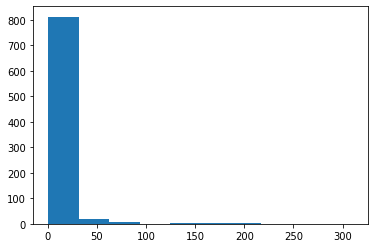

In [41]:
plt.hist(UberData['MILES*'])

(array([747.,  78.,   9.,   5.,   5.,   4.,   1.,   0.,   0.,   1.]),
 array([  1. ,  33.9,  66.8,  99.7, 132.6, 165.5, 198.4, 231.3, 264.2,
        297.1, 330. ]),
 <a list of 10 Patch objects>)

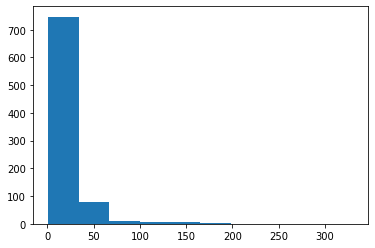

In [42]:
plt.hist(UberData['Duration'])

##### Both of the above are positively skewed distribution

#### 2. Next, he analyses the distributions of the two categorical variables ‘CATEGORY*’ and ‘PURPOSE*’ using bar plots. 

Business    781
Personal     69
Name: CATEGORY*, dtype: int64


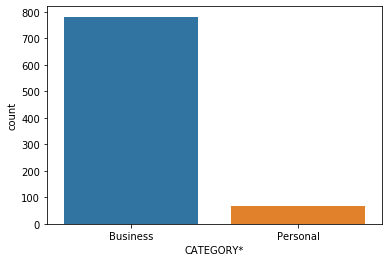

In [43]:
# bar plot of the 'CATEGORY*' column
print(UberData['CATEGORY*'].value_counts())
sns.countplot(x='CATEGORY*', data=UberData)

Meeting            485
Meal/Entertain     139
Errand/Supplies     92
Customer Visit      86
Temporary Site      25
Between Offices     17
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64


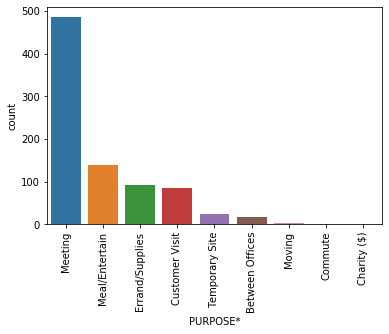

In [44]:
# bar plot of the 'PURPOSE*' column
print(UberData['PURPOSE*'].value_counts())
sns.countplot(x='PURPOSE*', data=UberData, order=UberData['PURPOSE*'].value_counts().index)
plt.xticks(rotation=90);

#### 3. Harsh makes a count plot for the days of the week, which will display the no. of trips made on the specific days of the week. 

4    152
1    122
0    121
6    118
5    117
2    113
3    107
Name: Weekday, dtype: int64


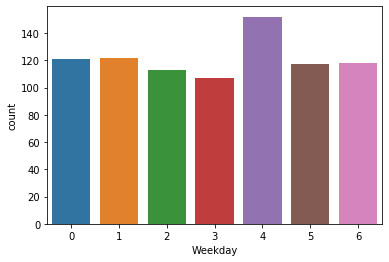

In [45]:
# count of the number of trips made on the different days of the week
print(UberData['Weekday'].value_counts())
sns.countplot(x='Weekday', data=UberData);


#### 4. The next thing that Harsh moves on to is inspecting the distributions of the two numerical variables ‘MILES*’ and ‘Duration’. He also creates boxplots to check if there are any outliers present in the dataset.

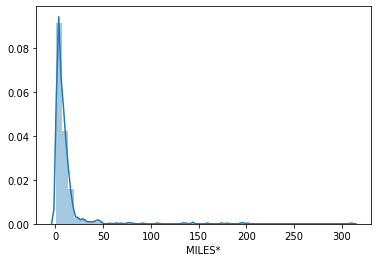

In [47]:
# histogram and kdeplot of the 'MILES*' variable
sns.distplot(UberData['MILES*'])
#plt.xlim(0, 50)

(0, 50)

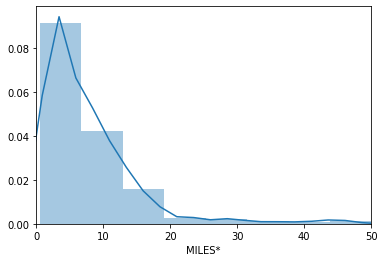

In [50]:
# To analyze distribution below 50
sns.distplot(UberData['MILES*'])
plt.xlim(0, 50)

(0, 50)

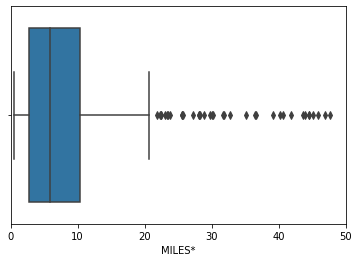

In [49]:
# boxplot to look for outliers
sns.boxplot(UberData['MILES*'])
plt.xlim(0, 50)

###### But the above ones are not actually outliers, they are just improbable points.

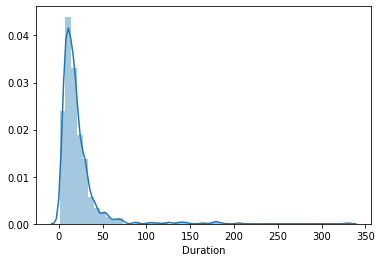

In [51]:
# histogram and kdeplot of the 'Duration' variable
sns.distplot(UberData['Duration'])
#plt.xlim(0, 50)

(0, 50)

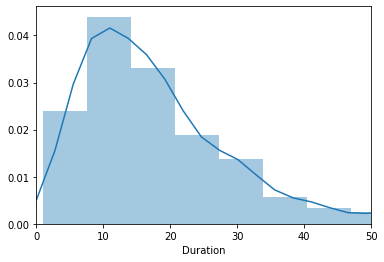

In [52]:
sns.distplot(UberData['Duration'])
plt.xlim(0, 50)

(0, 50)

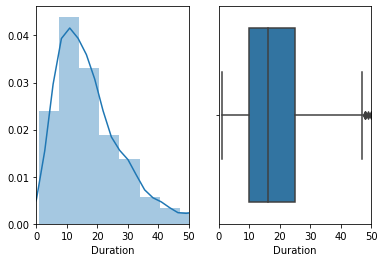

In [53]:
# histogram and kdeplot of the 'Duration' variable
plt.subplot(1, 2, 1)
sns.distplot(UberData['Duration'])
plt.xlim(0, 50)

# boxplot to look for outliers
plt.subplot(1, 2, 2)
sns.boxplot(UberData['Duration'])
plt.xlim(0, 50)

#### 5. Harsh expects that Jacob takes the maximum number of cab rides during the office hours. This is what he examines next. He makes bar plots to know how many trips start and end in different hours throughout the day. Similarly, he also analyses the frequency of trips during the different months of the year and the no. of trips taken on different days of the month. 

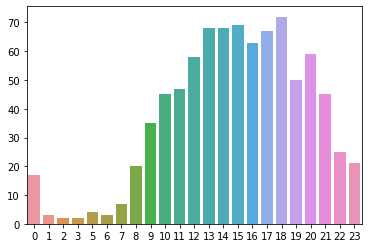

In [42]:
# count of the number of trips made on the different hours of the day
start_hour = pd.to_datetime(UberData['Start Time']).dt.hour.value_counts()

sns.barplot(x=start_hour.index, y=list(start_hour))

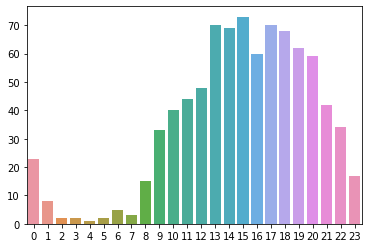

In [43]:
end_hour = pd.to_datetime(UberData['End Time']).dt.hour.value_counts()

sns.barplot(x=end_hour.index, y=list(end_hour))

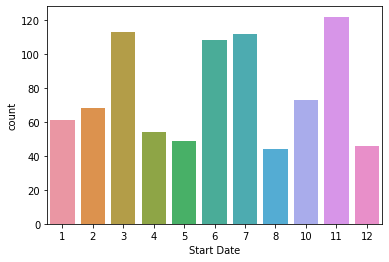

In [56]:
# count of the number of trips made on the different months of the year
sns.countplot(pd.to_datetime(UberData['Start Date']).dt.month)


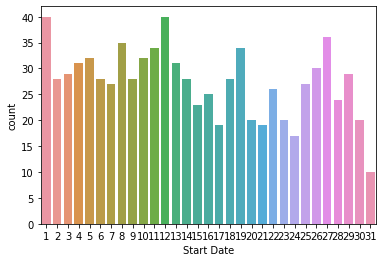

In [58]:
# count of the number of trips made on the different days of the month
sns.countplot(pd.to_datetime(UberData['Start Date']).dt.day)

In [60]:
# most frequent start locations
UberData['START*'].value_counts().nlargest(10)

Cary              201
Morrisville        85
Whitebridge        68
Durham             37
Raleigh            28
Apex               17
Westpark Place     17
Berkeley           16
Midtown            14
Kissimmee          11
Name: START*, dtype: int64

In [61]:
# most frequent end locations
UberData['STOP*'].value_counts().nlargest(10)

Cary              203
Morrisville        84
Whitebridge        65
Durham             36
Raleigh            29
Apex               17
Westpark Place     16
Berkeley           16
Kissimmee          12
Midtown            11
Name: STOP*, dtype: int64

In [62]:
# dataframe of most frequent locations
most_frequent_stops = UberData['STOP*'].value_counts().nlargest(10).index

df_filtered = UberData[UberData['STOP*'].isin(most_frequent_stops)]

In [64]:
pd.crosstab(df_filtered['STOP*'], df_filtered['CATEGORY*'])

CATEGORY*,Business,Personal
STOP*,,
Apex,17,0
Berkeley,16,0
Cary,197,6
Durham,36,0
Kissimmee,6,6
Midtown,10,1
Morrisville,80,4
Raleigh,29,0
Westpark Place,12,4


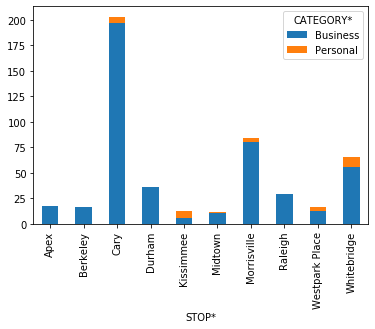

In [63]:
# stacked bar chart 
# crosstab is for two categorical variables
pd.crosstab(df_filtered['STOP*'], df_filtered['CATEGORY*']).plot.bar(stacked=True)

In [45]:
# dataframe of trips in same areas
df_same_area = UberData[UberData['START*']==UberData['STOP*']]

df_same_area.describe()

,MILES*,Weekday,Duration
count,118.000000,118.000000,118.000000
mean,4.683051,3.008475,14.805085
std,5.028471,1.958963,11.862646
min,0.500000,0.000000,1.000000
25%,1.800000,1.000000,7.250000
50%,3.400000,3.000000,12.000000
75%,5.500000,5.000000,16.000000
max,39.200000,6.000000,65.000000


In [46]:
# dataframe of trips in different areas
df_diff_area = UberData[UberData['START*']!=UberData['STOP*']]

df_diff_area.describe()

,MILES*,Weekday,Duration
count,732.000000,732.000000,732.000000
mean,11.411885,3.025956,22.348361
std,23.972887,1.999489,25.531188
min,0.500000,0.000000,2.000000
25%,3.000000,1.000000,10.000000
50%,6.250000,3.000000,17.000000
75%,10.500000,5.000000,25.000000
max,310.300000,6.000000,330.000000


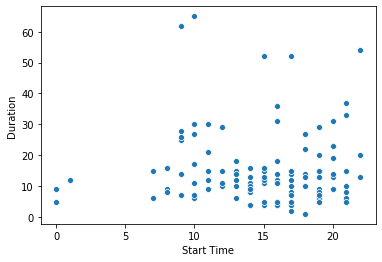

In [47]:
# for trips in same area
sns.scatterplot(x=pd.to_datetime(df_same_area['Start Time']).dt.hour, y=df_same_area['Duration'])

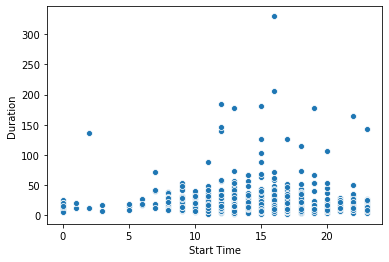

In [48]:
# for trips in different areas
sns.scatterplot(x=pd.to_datetime(df_diff_area['Start Time']).dt.hour, y=df_diff_area['Duration'])

In [71]:
# dataframe for trips that take place on Fridays
df_fri = UberData[UberData['Weekday'] == 4]

In [72]:
df_fri.describe()

,MILES*,Weekday,Duration
count,152.000000,152.0,152.000000
mean,14.517763,4.0,25.013158
std,34.459011,0.0,35.104949
min,0.700000,4.0,2.000000
25%,3.300000,4.0,11.000000
50%,8.450000,4.0,18.000000
75%,11.225000,4.0,24.000000
max,310.300000,4.0,330.000000


In [73]:
# finding the no. of trips in same and different areas on Fridays
print(len(df_fri[df_fri['START*'] == df_fri['STOP*']]))
print(len(df_fri[df_fri['START*'] != df_fri['STOP*']]))

14
138


count    850.000000
mean       0.410076
std        0.247251
min        0.100000
25%        0.263844
50%        0.363636
75%        0.488810
max        3.800000
Name: Speed, dtype: float64


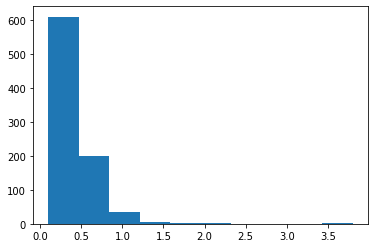

In [50]:
# creating the 'Speed' column
UberData['Speed'] = UberData['MILES*']/UberData['Duration']

# statistical summary
print(UberData['Speed'].describe())

# histogram
plt.hist(UberData['Speed']);

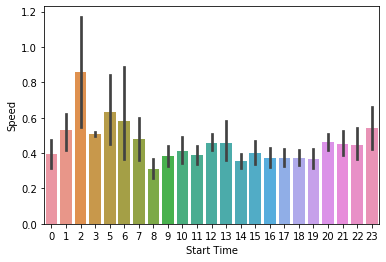

In [51]:
# speed during the different hours of the day
sns.barplot(x=pd.to_datetime(UberData['Start Time']).dt.hour, y=UberData['Speed'])

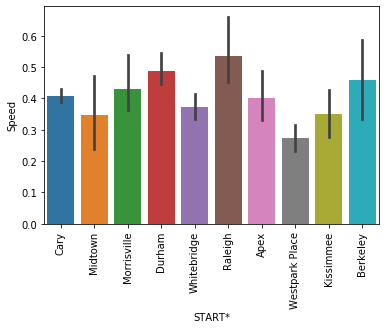

In [76]:
# speed in the different locations of the most frequent starting points
most_frequent_starts = UberData['START*'].value_counts().nlargest(10).index

df_filtered = UberData[UberData['START*'].isin(most_frequent_starts)]

sns.barplot(x='START*', y='Speed', data=df_filtered)
plt.xticks(rotation=90);

#### Finally, the relationship between the variables 'MILES*' and 'Duration' is inspected. He also wants to check if the weekday that a trip takes place on affects its duration. 

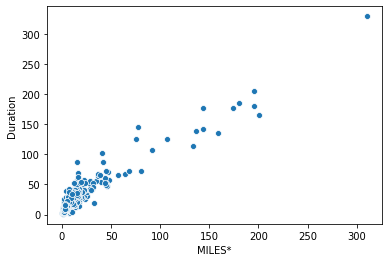

In [77]:
sns.scatterplot(data = UberData, x = 'MILES*', y = 'Duration');

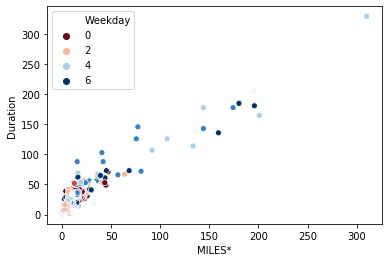

In [79]:
sns.scatterplot(data = UberData, x = 'MILES*', y = 'Duration', hue = 'Weekday', palette="RdBu");

(0, 100)

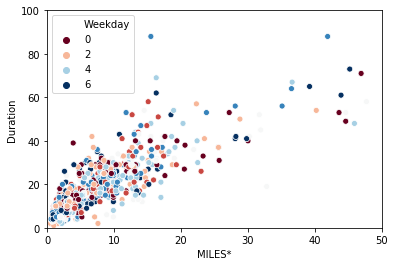

In [80]:
sns.scatterplot(data = UberData, x = 'MILES*', y = 'Duration', hue = 'Weekday', palette="RdBu");
plt.xlim(0,50)
plt.ylim(0,100)

## Inferential Statistics

In [82]:
UberData.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration,Speed
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,4,6.0,0.850000
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,2016-01-02,01:25:00,2016-01-02,01:37:00,5,12.0,0.416667
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,5,13.0,0.369231
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,14.0,0.335714
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,2,67.0,0.950746


#### 1. Harsh starts with testing whether there is any significant difference in the duration of the trips when the trip had the same start and end location compared to a trip with different start and stop locations. For this purpose, he uses an independent two-sample t-test.

In [84]:
# making the series
short_trips = UberData[UberData['START*'] == UberData['STOP*']]['Duration']
long_trips = UberData[UberData['START*'] != UberData['STOP*']]['Duration']

In [85]:
# performing the test
stats.ttest_ind(short_trips, long_trips)


Ttest_indResult(statistic=-3.153834200568637, pvalue=0.0016681600501869647)

#### 2. The hour of the day that the trip starts in can depend on the fact that whether it is a trip in the same area or to a different area. Jacob can be motivated to opt for long-distance trips during specific hours of the day, considering his work schedule or traffic conditions. To check for this, Harsh again runs an independent two-sample t-test.

In [52]:
# making the series
start_hour_st = pd.to_datetime(UberData[UberData['START*'] == UberData['STOP*']]['Start Time']).dt.hour
start_hour_lt = pd.to_datetime(UberData[UberData['START*'] != UberData['STOP*']]['Start Time']).dt.hour

In [55]:
# performing the test
stats.ttest_ind(start_hour_st, start_hour_lt)

Ttest_indResult(statistic=0.03169655757182658, pvalue=0.9747214986447293)

#### 3. The duration of the trip can also depend on the purpose of the trip. This is checked using a oneway ANOVA test. 

In [56]:
UberData['PURPOSE*'].value_counts()

Meeting            485
Meal/Entertain     139
Errand/Supplies     92
Customer Visit      86
Temporary Site      25
Between Offices     17
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

In [57]:
# making the series
Meeting = UberData[UberData['PURPOSE*'] == 'Meeting']['Duration']
Meal = UberData[UberData['PURPOSE*'] == 'Meal/Entertain']['Duration']
Errand = UberData[UberData['PURPOSE*'] == 'Errand/Supplies']['Duration']
CV = UberData[UberData['PURPOSE*'] == 'Customer Visit']['Duration']
TS = UberData[UberData['PURPOSE*'] == 'Temporary Site']['Duration']
BO = UberData[UberData['PURPOSE*'] == 'Between Offices']['Duration']


In [58]:
# performing the test
anova_result = stats.f_oneway(Meeting, Meal, Errand, CV, TS, BO)
anova_result


F_onewayResult(statistic=11.296289554038825, pvalue=1.4648137069937668e-10)

In [59]:
# making the series
Mon = UberData[UberData['Weekday'] == 0]['Duration']
Tue = UberData[UberData['Weekday'] == 1]['Duration']
Wed = UberData[UberData['Weekday'] == 2]['Duration']
Thu = UberData[UberData['Weekday'] == 3]['Duration']
Fri = UberData[UberData['Weekday'] == 4]['Duration']
Sat = UberData[UberData['Weekday'] == 5]['Duration']
Sun = UberData[UberData['Weekday'] == 6]['Duration']


In [60]:
# performing the test
anova_result = stats.f_oneway(Mon, Tue, Wed, Thu, Fri, Sat, Sun)
anova_result


F_onewayResult(statistic=2.679524906963419, pvalue=0.01395144798702145)

#### Finally, Harsh checks whether the two features 'PURPOSE*' and 'Weekday' are independent of each other, as there is a possibility that the meetings might take place only on the weekdays, trips for supplies or entertainment take place on weekends and likewise. A Chi-Square test is used here.


In [90]:
# making the contingency table
crosstab = pd.crosstab(UberData['PURPOSE*'], UberData['Weekday'])
crosstab

Weekday,0,1,2,3,4,5,6
PURPOSE*,,,,,,,
Between Offices,4,2,4,0,1,3,3
Charity ($),0,0,0,0,0,0,1
Commute,0,0,0,0,0,0,1
Customer Visit,16,8,15,9,16,11,11
Errand/Supplies,13,18,7,13,15,14,12
Meal/Entertain,25,22,18,18,20,18,18
Meeting,57,68,67,58,93,71,71
Moving,4,0,0,0,0,0,0
Temporary Site,2,4,2,9,7,0,1


In [91]:
#performing the test
stats.chi2_contingency(crosstab)

(76.35368743040026,
 0.005708652088386965,
 48,
 array([[ 2.42      ,  2.44      ,  2.26      ,  2.14      ,  3.04      ,
          2.34      ,  2.36      ],
        [ 0.14235294,  0.14352941,  0.13294118,  0.12588235,  0.17882353,
          0.13764706,  0.13882353],
        [ 0.14235294,  0.14352941,  0.13294118,  0.12588235,  0.17882353,
          0.13764706,  0.13882353],
        [12.24235294, 12.34352941, 11.43294118, 10.82588235, 15.37882353,
         11.83764706, 11.93882353],
        [13.09647059, 13.20470588, 12.23058824, 11.58117647, 16.45176471,
         12.66352941, 12.77176471],
        [19.78705882, 19.95058824, 18.47882353, 17.49764706, 24.85647059,
         19.13294118, 19.29647059],
        [69.04117647, 69.61176471, 64.47647059, 61.05294118, 86.72941176,
         66.75882353, 67.32941176],
        [ 0.56941176,  0.57411765,  0.53176471,  0.50352941,  0.71529412,
          0.55058824,  0.55529412],
        [ 3.55882353,  3.58823529,  3.32352941,  3.14705882,  4.47058824